In [60]:
import numpy as np
import pandas as pd
from Functions import *
import datetime
import seaborn as sns

In [123]:
import plotly.express as px
import matplotlib.pyplot as plt

In [59]:
url = "https://data.ct.gov/api/views/rybz-nyjw/rows.csv?accessType=DOWNLOAD"
Drug_Deaths = pd.read_csv(url)
url2 = "https://data.ct.gov/api/views/erbt-mpgb/rows.csv?accessType=DOWNLOAD"
Addiction_Treatment = pd.read_csv(url2)

## Exploratory Data Analysis

In [4]:
Drug_Deaths.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [5]:
Addiction_Treatment.head()

,FiscalYear,MonthYear,Town,AdmMonth,FYMonthOrder,AdmYear,PrimaryDrug,AdmCount
0,2014,Jan-14,Ansonia,1,7,2014,Alcohol,14.0
1,2014,Jan-14,Ansonia,1,7,2014,Crack,NaN
2,2014,Jan-14,Ansonia,1,7,2014,Heroin,8.0
3,2014,Jan-14,Ansonia,1,7,2014,"Marijuana, Hashish, THC",NaN
4,2014,Jan-14,Ansonia,1,7,2014,Other Opiates and Synthetics,NaN


### EDA for Drugs_Death & Addiction_Treatment

In [222]:
def EDA_dataframe(df):
    print("Top 5 rows: {}".format(df.head()))
    print("The number of rows are:{}. the number of columns are: {}".format(df.shape[0], df.shape[1]))
    print("The number of null values in each column: {}".format(df.isnull().sum()))
    print("The datatype of each column is {}".format(df.dtypes))

In [223]:
#Obtaining the information about the dataframes
EDA_dataframe(Drug_Deaths)
EDA_dataframe(Addiction_Treatment)

Top 5 rows:         ID                    Date      DateType   Age     Sex          Race  \
0  14-0273  06/28/2014 12:00:00 AM  DateReported   NaN     NaN           NaN   
1  13-0102  03/21/2013 12:00:00 AM   DateofDeath  48.0    Male         Black   
2  16-0165  03/13/2016 12:00:00 AM   DateofDeath  30.0  Female         White   
3  16-0208  03/31/2016 12:00:00 AM   DateofDeath  23.0    Male         White   
4  13-0052  02/13/2013 12:00:00 AM   DateofDeath  22.0    Male  Asian, Other   

  ResidenceCity ResidenceCounty ResidenceState  DeathCity  ...  \
0           NaN             NaN            NaN        NaN  ...   
1       NORWALK             NaN            NaN    NORWALK  ...   
2    SANDY HOOK       FAIRFIELD             CT    DANBURY  ...   
3           RYE     WESTCHESTER             NY  GREENWICH  ...   
4      FLUSHING          QUEENS            NaN  GREENWICH  ...   

  Morphine_NotHeroin Hydromorphone Other OpiateNOS AnyOpioid MannerofDeath  \
0                NaN           N

###EDA for Drug_Deaths

In [8]:
#Get the number of deaths due to each drug
Drug_names=["Heroin","Cocaine","Fentanyl","FentanylAnalogue","Oxycodone","Oxymorphone","Ethanol","Hydrocodone","Benzodiazepine","Methadone","Amphet","Tramad","Morphine_NotHeroin","Hydromorphone","Other"]

for drug in Drug_names:
    print("Number of deaths due to: {} is {}".format(drug,Drug_Deaths[drug].notnull().sum()))

Number of deaths due to: Heroin is 2529
Number of deaths due to: Cocaine is 1521
Number of deaths due to: Fentanyl is 2232
Number of deaths due to: FentanylAnalogue is 389
Number of deaths due to: Oxycodone is 607
Number of deaths due to: Oxymorphone is 108
Number of deaths due to: Ethanol is 1247
Number of deaths due to: Hydrocodone is 118
Number of deaths due to: Benzodiazepine is 1343
Number of deaths due to: Methadone is 474
Number of deaths due to: Amphet is 159
Number of deaths due to: Tramad is 130
Number of deaths due to: Morphine_NotHeroin is 42
Number of deaths due to: Hydromorphone is 25
Number of deaths due to: Other is 435


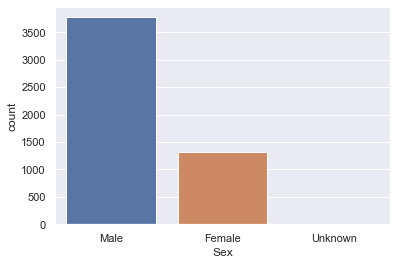

In [36]:
#Get the number of males and females
df1=Drug_Deaths.dropna(subset=[3], axis=1)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sex", data=df1)

In [224]:
#Plot the histogram for Age to get the distribution of the age group
#majority of the drug related death victims are aged 25-55 years
fig = px.histogram(Drug_Deaths, x="Age", nbins=40, color_discrete_sequence=['indianred'])
fig.show()

### EDA for Addiction_Treatment

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Alcohol'),
  Text(1, 0, 'Crack'),
  Text(2, 0, 'Heroin'),
  Text(3, 0, 'Marijuana, Hashish, THC'),
  Text(4, 0, 'Other Opiates and Synthetics'),
  Text(5, 0, 'Benzodiazepines'),
  Text(6, 0, 'Cocaine'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'PCP'),
  Text(9, 0, 'Barbiturates'),
  Text(10, 0, 'Inhalants'),
  Text(11, 0, 'Non-Prescriptive Methadone'),
  Text(12, 0, 'Hallucinogens: LSD, DMS, STP, etc'),
  Text(13, 0, 'Amphetamines'),
  Text(14, 0, 'Methamphetamines'),
  Text(15, 0, 'Over-the-Counter'),
  Text(16, 0, 'Other Sedatives or Hypnotics'),
  Text(17, 0, 'Other Stimulants'),
  Text(18, 0, 'Tranquilizers'),
  Text(19, 0, 'Tobacco'),
  Text(20, 0, 'Cocaine/Crack')])

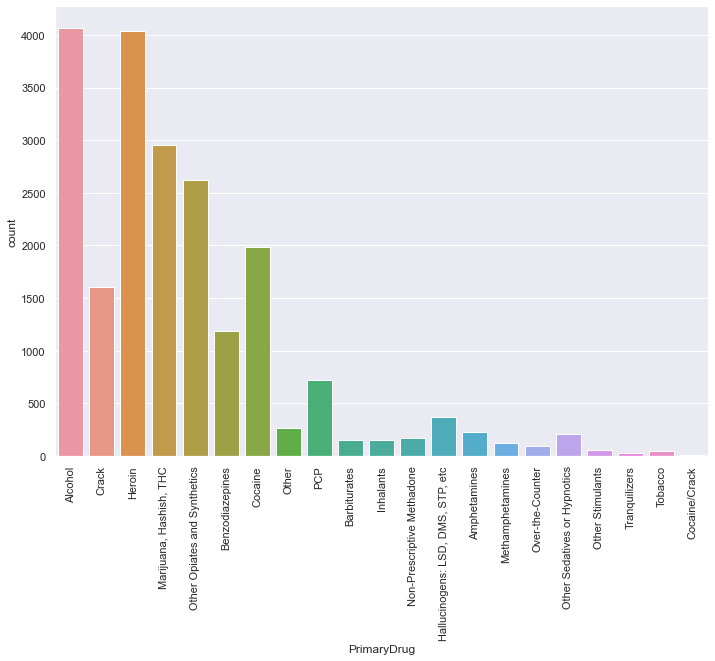

In [221]:
#countplot for the number of people admitted due to different drug use
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.countplot(x="PrimaryDrug",data=Addiction_Treatment)
plt.xticks(rotation=90)

### Hypothesis 2
Hypothesis 2: People are more likely to die due to accidental death because of Ethanol consumption than drug use due to the consumption of Morphine_NotHeroin.

In [ ]:
##Data cleaning

In [235]:
Drug_Deaths_Clean.shape

(2202, 42)

In [236]:
Drug_Deaths_Clean.loc[Drug_Deaths_Clean.MannerofDeath=="accident", "MannerofDeath"]="Accident"
Drug_Deaths_Clean.loc[Drug_Deaths_Clean.MannerofDeath=="ACCIDENT", "MannerofDeath"]="Accident"

/Users/gayatrikvr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [237]:
Drug_Deaths_Clean.isnull().sum()

ID                        0
Date                      0
DateType                  0
Age                       2
Sex                       2
Race                      8
ResidenceCity            75
ResidenceCounty         630
ResidenceState          614
DeathCity                 2
DeathCounty            1075
Location                 15
LocationifOther        1985
DescriptionofInjury     755
InjuryPlace              43
InjuryCity              855
InjuryCounty           1811
InjuryState            1798
COD                       0
OtherSignifican        2143
Heroin                  967
Cocaine                1626
Fentanyl               1457
FentanylAnalogue       2202
Oxycodone              1896
Oxymorphone            2160
Ethanol                1645
Hydrocodone            2147
Benzodiazepine         1582
Methadone              1995
Amphet                 2150
Tramad                 2154
Morphine_NotHeroin     2174
Hydromorphone          2202
Other                  1989
OpiateNOS           

In [238]:
#Since the column "MannerofDeath" contains only 4 missing rows; which is insignificant as compared to the size of the dataset, we can drop the 4 rows
Drug_Deaths_Clean.dropna(subset=["MannerofDeath"])

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,FiscalYear
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",2014
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN,2016
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN,2016
5,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,Accident,"BRISTOL, CT\n(41.673037, -72.945791)","BRISTOL, CT\n(41.673037, -72.945791)","CT\n(41.575155, -72.738288)",2014
11,15-0334,07/05/2015 12:00:00 AM,DateReported,49.0,Female,White,NaN,NaN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,Y,Accident,"New Haven, CT\n(41.308252, -72.924161)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,14-0166,04/17/2014 12:00:00 AM,DateofDeath,56.0,Male,White,PLYMOUTH,NaN,NaN,PLYMOUTH,...,NaN,NaN,NaN,NaN,NaN,Accident,"PLYMOUTH, CT\n(41.671982, -73.052909)","PLYMOUTH, CT\n(41.671982, -73.052909)","CT\n(41.575155, -72.738288)",2014
5099,15-0013,01/07/2015 12:00:00 AM,DateReported,45.0,Female,White,WATERBURY,NEW HAVEN,CT,WATERBURY,...,NaN,NaN,NaN,NaN,Y,Accident,"WATERBURY, CT\n(41.554261, -73.043069)","WATERBURY, CT\n(41.554261, -73.043069)","CT\n(41.575155, -72.738288)",2015
5100,15-0466,09/08/2015 12:00:00 AM,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,NaN,NaN,NaN,NaN,NaN,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)",2015
5103,14-0124,03/16/2014 12:00:00 AM,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,...,NaN,NaN,NaN,NaN,NaN,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",2014


In [239]:
Drugs_Grouped=Drug_Deaths_Clean.groupby(["MannerofDeath","Sex","FiscalYear"]).agg({"Morphine_NotHeroin":"count","Ethanol":"count"})

In [240]:
Drugs_Grouped.reset_index(inplace=True)

In [241]:
Drugs_Grouped.drop([6,7],inplace=True)

In [242]:
Drugs_Grouped

,MannerofDeath,Sex,FiscalYear,Morphine_NotHeroin,Ethanol
0,Accident,Female,2014,0,29
1,Accident,Female,2015,5,35
2,Accident,Female,2016,7,54
3,Accident,Male,2014,0,97
4,Accident,Male,2015,7,139
5,Accident,Male,2016,9,201


In [243]:
Drugs_Grouped["FiscalYear"]=Drugs_Grouped["FiscalYear"].astype(str)

In [189]:
# Number of Morphine_NotHeroin deaths for male and female population
fig = px.bar(Drugs_Grouped, x="FiscalYear", y="Morphine_NotHeroin",facet_col="Sex", color="Ethanol",color_discrete_sequence=px.colors.diverging.Spectral[-2::-1])
fig.show()

In [190]:
#Number of Ethanol deaths for male and female population
fig = px.bar(Drugs_Grouped, x="FiscalYear", y="Ethanol",facet_col="Sex", color="Ethanol",color_discrete_sequence=px.colors.diverging.Spectral[-2::-1])
fig.show()

In [244]:
#Stacked plot of "Ethanol", "Morphine_NotHeroin" related deaths as per Fiscal year
fig = px.bar(Drugs_Grouped, x="FiscalYear", y=["Ethanol", "Morphine_NotHeroin"], title="Number of deaths per fiscal year")
fig.show()

In [245]:
#Stacked plot of "Ethanol", "Morphine_NotHeroin" related deaths as per Gender
fig = px.bar(Drugs_Grouped, x="Sex", y=["Ethanol", "Morphine_NotHeroin"], title="Number of deaths per gender")
fig.show()

In [201]:
#Total number of deaths
Ethanol_sum=Drugs_Grouped["Ethanol"].sum()
Morphine_NotHeroin_sum=Drugs_Grouped["Morphine_NotHeroin"].sum()
print("Total Ethanol deaths {}".format(Ethanol_sum))
print("Total Morphine_NotHeroin deaths {}".format(Morphine_NotHeroin_sum))

Total Ethanol deaths 555
Total Morphine_NotHeroin deaths 28


In [246]:
#Percentage by which Morphine_NotHeroin deaths are greater than ethanol deaths
(Ethanol_sum-Morphine_NotHeroin_sum)/Ethanol_sum*100

94.95495495495496

In [ ]:
Since there are 94.9% more deaths due to the consumption of alcohol, this proves the hypothesis

## Hypothesis I :
The proportion of deaths vs the total number of people admitted for the consumption of the drug Heroin is greater than the proportion of deaths vs the total number of people admitted for the consumption of the drug Cocaine.

Extracting Date Col as a seperate Col for Admissions File

In [234]:
Drug_Deaths = extract_year(Drug_Deaths) # calling the function to get year col in Drug Deaths 
# Creating a new dataframe to store the date for years 2014-2016

Drug_Deaths_Clean = Drug_Deaths[(Drug_Deaths.FiscalYear == 2014) | (Drug_Deaths.FiscalYear == 2015) | (Drug_Deaths.FiscalYear == 2016)]

In [226]:
Drug_Deaths_Clean.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,FiscalYear
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",2014
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN,2016
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN,2016
5,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,Accident,"BRISTOL, CT\n(41.673037, -72.945791)","BRISTOL, CT\n(41.673037, -72.945791)","CT\n(41.575155, -72.738288)",2014
11,15-0334,07/05/2015 12:00:00 AM,DateReported,49.0,Female,White,NaN,NaN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,Y,Accident,"New Haven, CT\n(41.308252, -72.924161)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",2015
